In [1]:
#Kaitlyn Kirt, CMOR 220, Spring 2024, Interpolation Project
#Project10.ipynb
#This script uses finds coefficients for the Newton Polynomial and compares it to a Bell Curve
#Last Modified: April 15, 2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x): 
#inputs: x
#outputs: none
#description: this function evaluates an expression
    return np.exp(-10*(x-0.2)**2)

In [4]:
def Newton(x): 
#inputs: x
#outputs: none
#description: this function creates the matrix A 
    n=len(x) 
    A=np.zeros((n,n)) #preallocates A  
    A[:,0]=1 #sets the first column of the matrix as ones
    for i in range (0,n-1): #runs the loop for n-1 times
        A[:,i+1]=A[:,i]*(x-x[i]) #sets all rows and columns equal to the previous column with an added multiplied term
    return A

In [5]:
def NewtonPoly(coeff,x,n): 
#inputs: coeff,x,n
#outputs: none
#description: this function fits 130 points into the Newton Polynomial
    t=np.linspace(-1,1,n) #span of points to start as t
    tterm=1 #defines tterm
    p=coeff[0] #defines p
    for i in range(0,len(coeff)-1): #runs the loop for len(coeff)-1 times
        tterm=tterm*(t-x[i]) #defines the tterm
        p=p+(coeff[i+1]*tterm) #evaluate the polynomial 
    return p

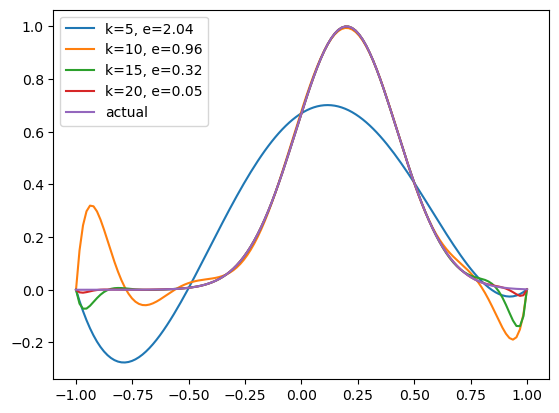

In [6]:
n=130
y=np.linspace(-1,1,n)
for k in [5,10,15,20]: #creates a loop to run through values of k 
    x=np.linspace(-1,1,k) #distributes the points of x
    A=Newton(x) #returns the matrix A
    load=f(x) #obtains the load vector 
    coeffk=np.linalg.solve(A,load) #solves for the coefficients
    p=NewtonPoly(coeffk,x,n) #returns p
    e=np.linalg.norm(p-f(y)) #solves for the error
    T="k="+str(k)+", e="+str(round(e,2)) #creates a label of error
    plt.plot(y,p,label=T) #plots p over 130 points
plt.plot(y,f(y), label = 'actual') #plot for the actual bell curve
plt.legend() #creates a legend for the figure 
plt.show()

#The k that gives the best fit for the function is 20. 